<a href="https://colab.research.google.com/github/JehanNirmal/Object-Counting-Using-a-Custom-YOLOv8-Model/blob/main/Training_a_custom_YOLOv8_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing and importing required libraries

In [1]:
!nvidia-smi

Tue Aug  6 02:59:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

**1. Project Creation:**



1. Create a Roboflow account if you don't have one.
2. Create a new project in the Roboflow dashboard.
3. Select "Object Detection" as the project type for object detection tasks.


**2. Data Uploading:**

1. Add your image data to the project.
2. Use the web interface by dragging and dropping a directory containing images and annotations in a supported format.
3. Utilize the Roboflow API for programmatic uploads.

**Image Labeling:**

1. If you only have images without annotations, use the Roboflow Annotate tool to label objects in your images.
2. Create bounding boxes and assign class labels to objects.

**Dataset Version Generation:**

1. Create a new dataset version to process and prepare your data for training.
2. Apply optional preprocessing techniques (resizing, cropping, normalization) to improve data quality.
3. Implement data augmentation (flipping, rotation, scaling) to increase dataset diversity.
4. Define training, validation, and test sets to evaluate model performance.

**Dataset Export:**

1. Export the generated dataset version in the desired format (e.g., YOLOv5 PyTorch).
2. Download the exported dataset for use in your training pipeline.

## Connect the dataset using an API and Download

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="l4o017khFbZOWBNh9Aa8")
project = rf.workspace("jehan-4hquy").project("metal-part-detection")
version = project.version(1)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to metal-part-detection-1 in yolov8:: 100%|██████████| 328/328 [00:00<00:00, 6505.53it/s]


## Custom Model Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 296MB/s]
New https://pypi.org/project/ultralytics/8.2.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/metal-part-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png		train_batch136.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch137.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1722913257.261b21c2c511.1354.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch135.jpg	weights


/content


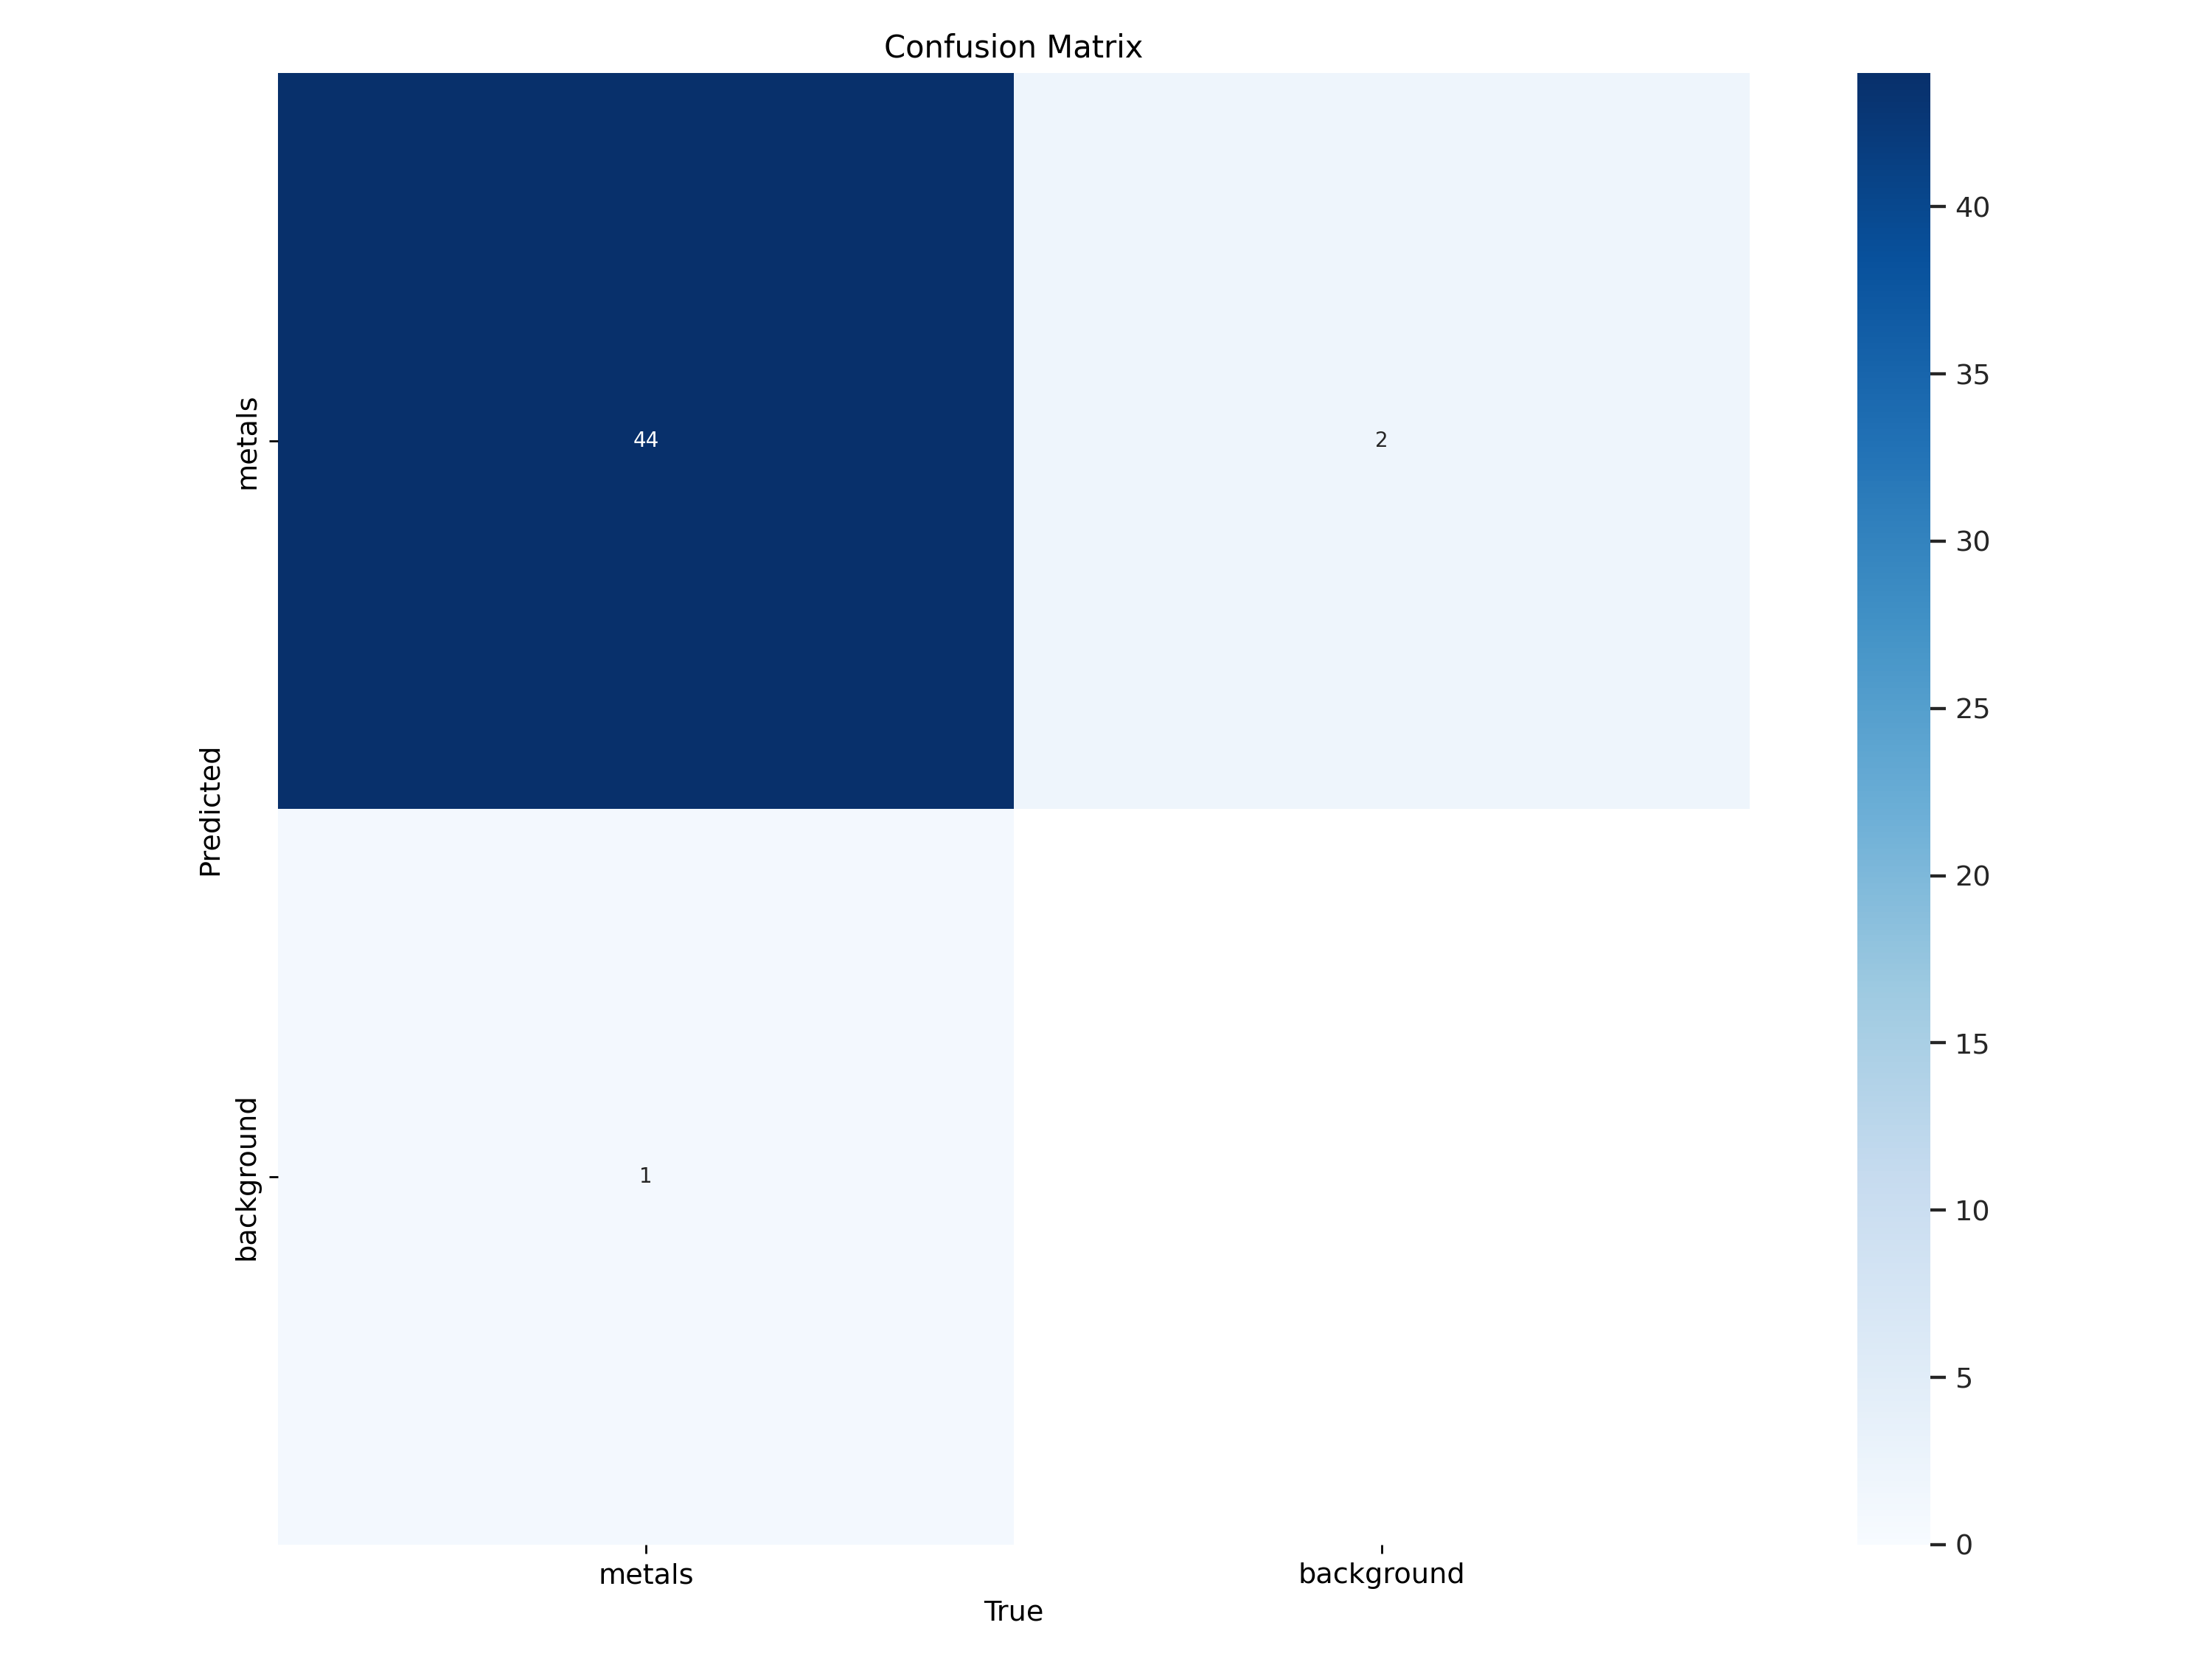

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


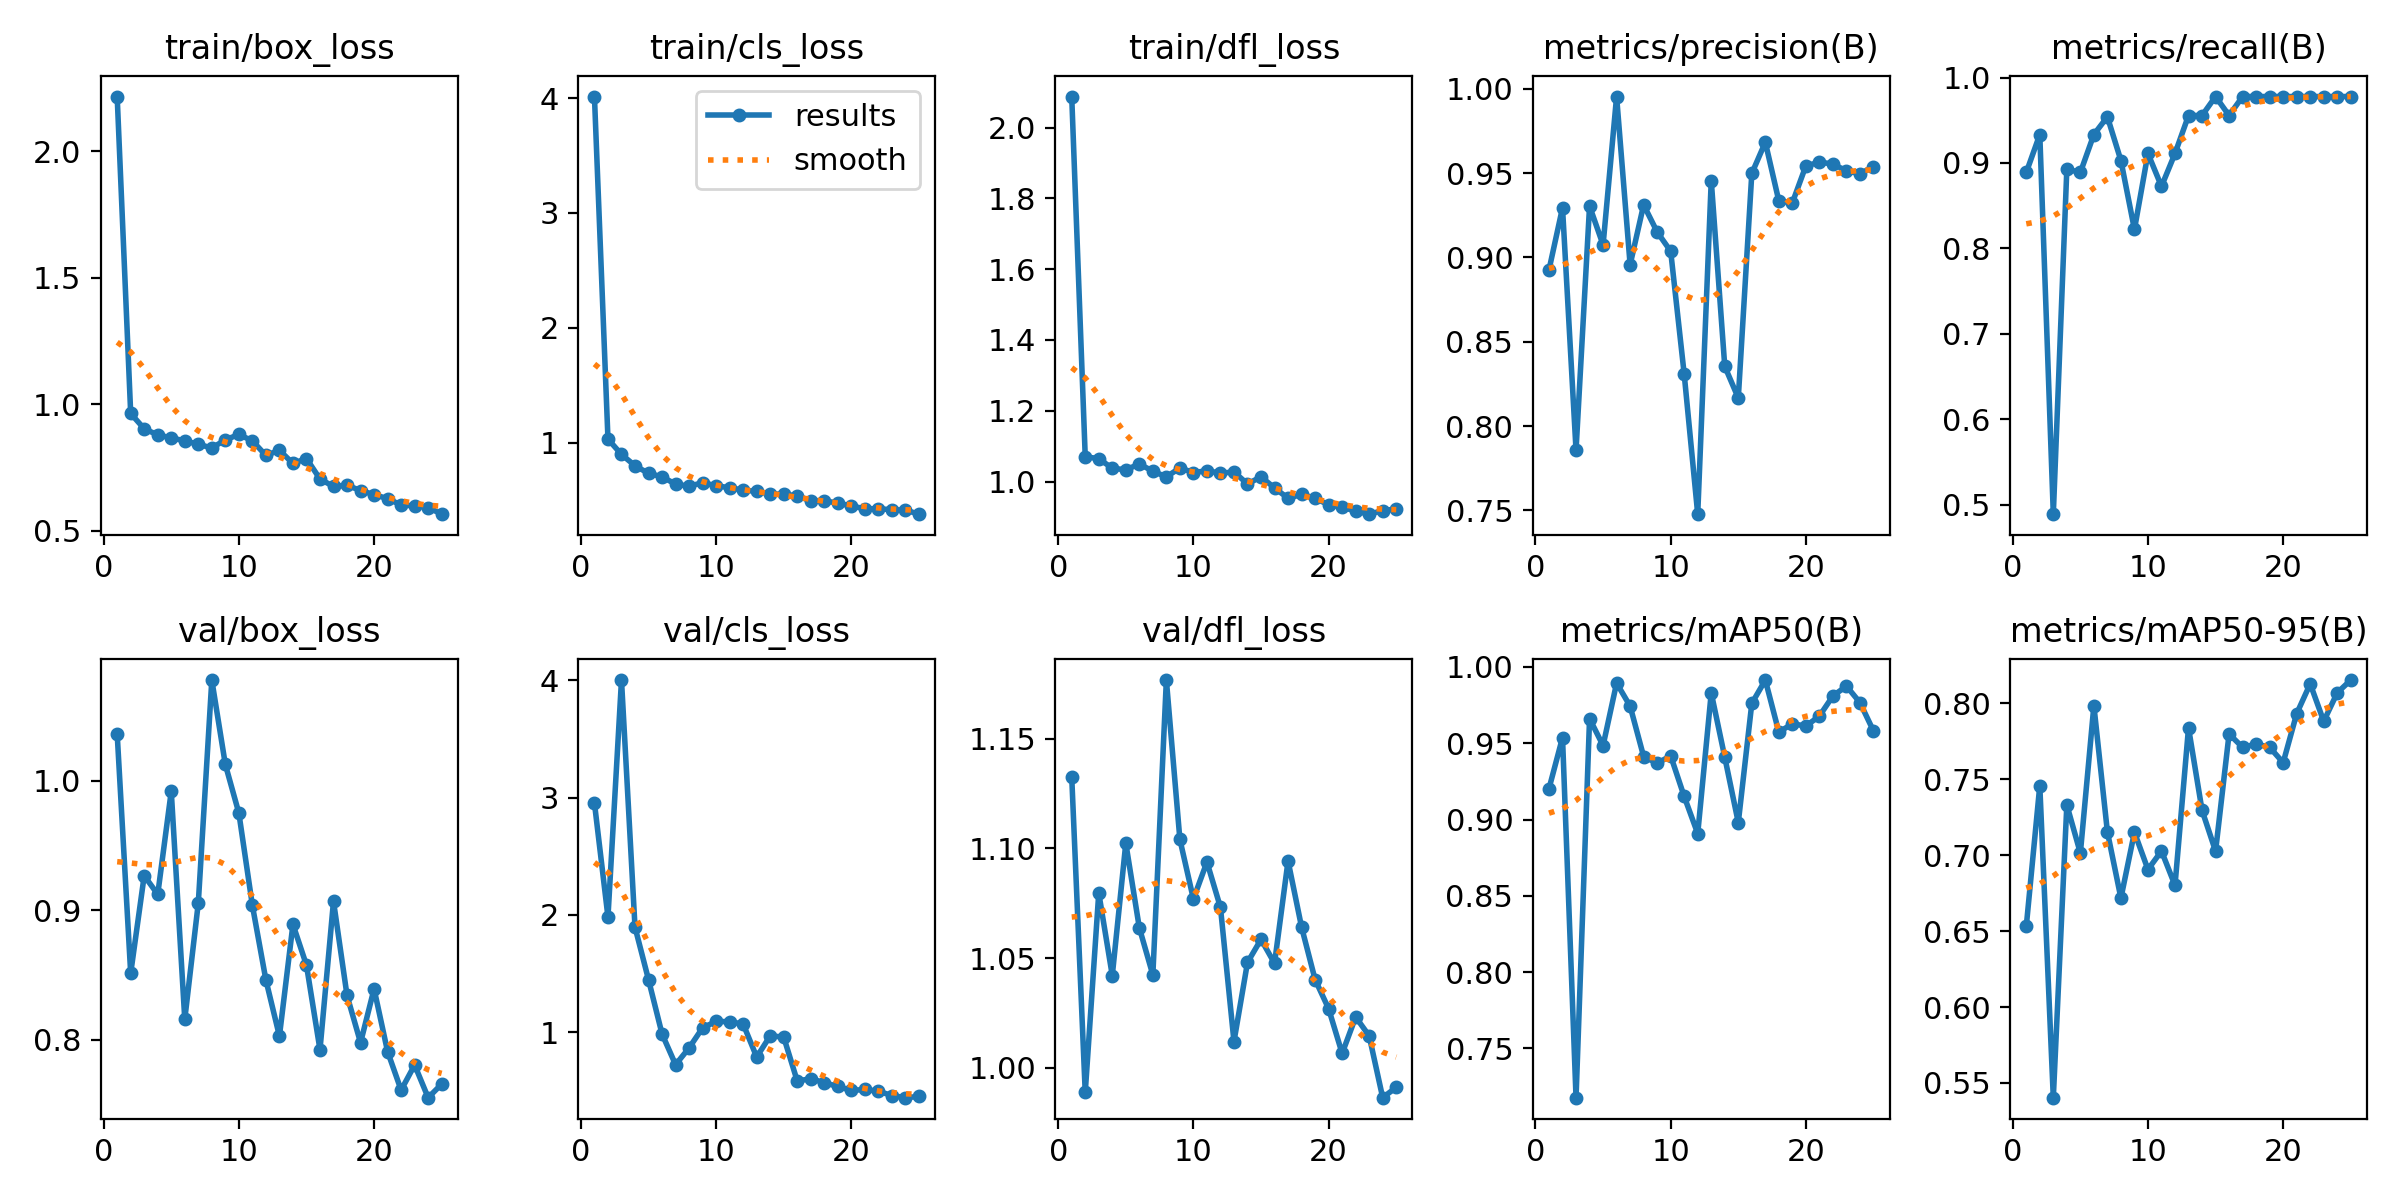

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


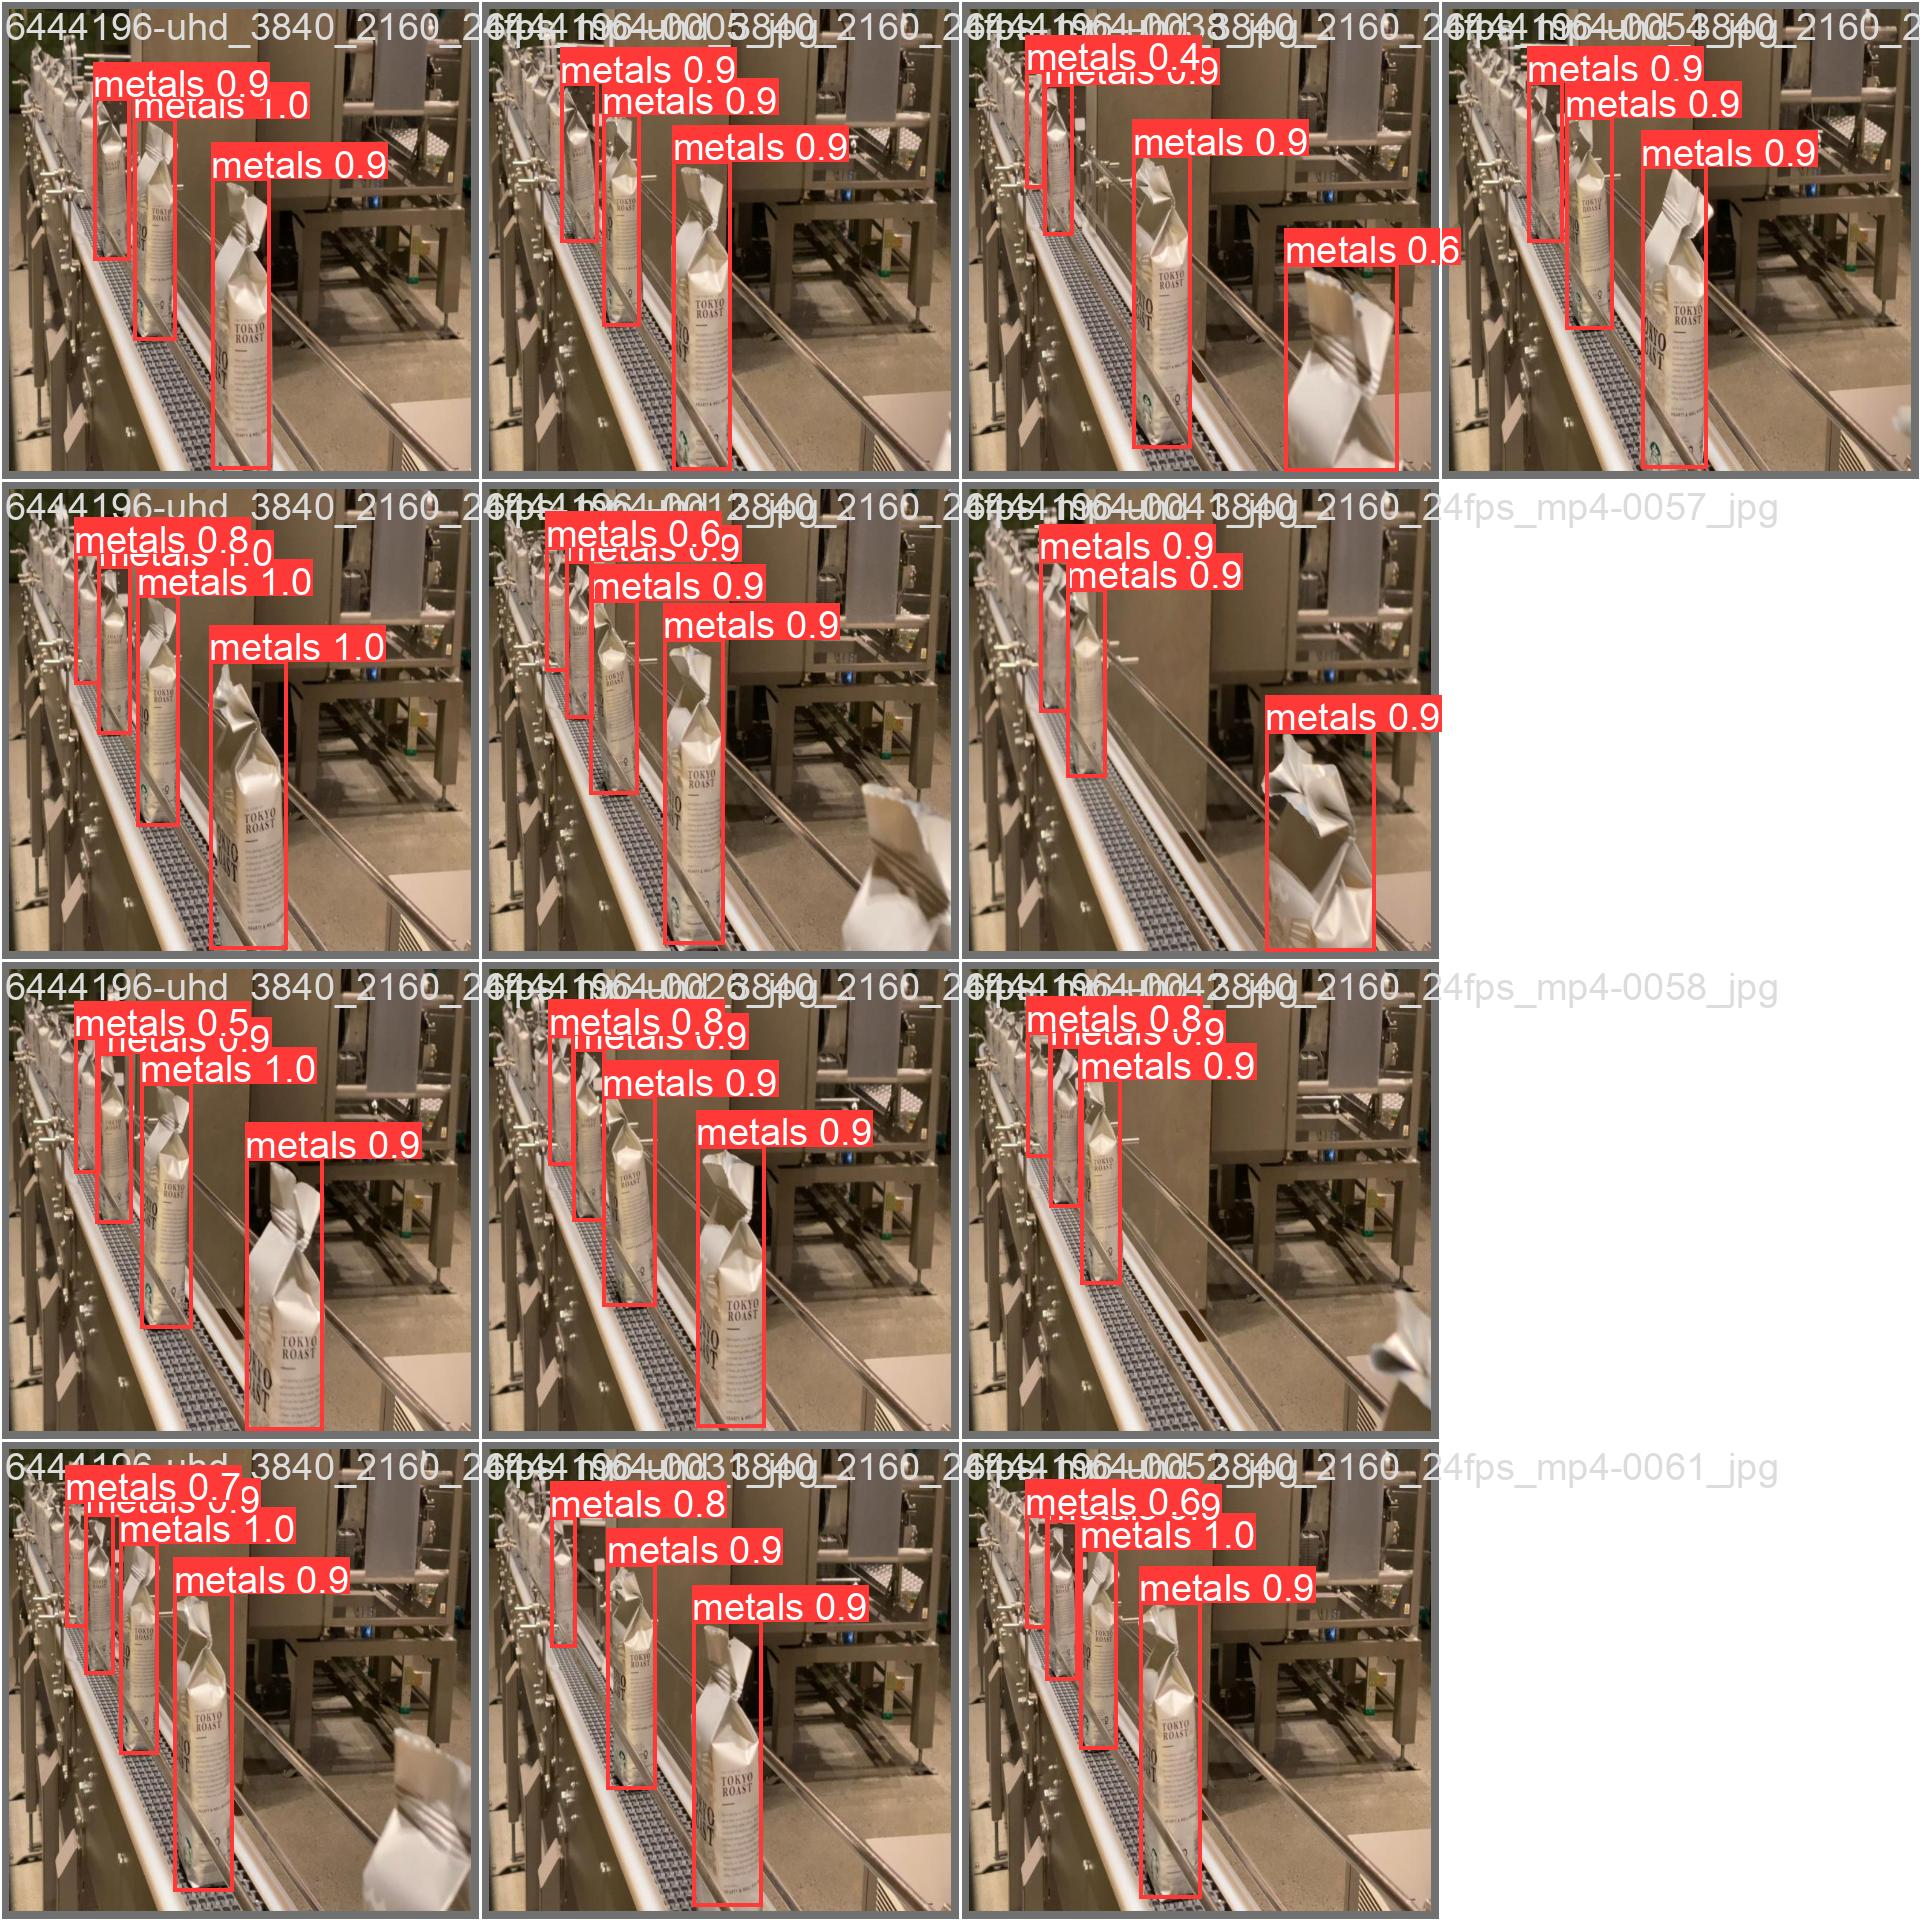

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/metal-part-detection-1/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.15s/it]
                   all         13         45      0.955      0.978       0.98      0.815
Speed: 0.4ms preprocess, 18.7ms inference, 0.0ms loss, 54.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/7 /content/datasets/metal-part-detection-1/test/images/6444196-uhd_3840_2160_24fps_mp4-0000_jpg.rf.56ed598248d1cbb45dae06a10db4a2c1.jpg: 800x800 5 metalss, 22.5ms
image 2/7 /content/datasets/metal-part-detection-1/test/images/6444196-uhd_3840_2160_24fps_mp4-0008_jpg.rf.68e3bc1785c2ff09d85b674841b07c12.jpg: 800x800 4 metalss, 22.5ms
image 3/7 /content/datasets/metal-part-detection-1/test/images/6444196-uhd_3840_2160_24fps_mp4-0010_jpg.rf.2d3f6997501b145de710109c167eb825.jpg: 800x800 4 metalss, 22.4ms
image 4/7 /content/datasets/metal-part-detection-1/test/images/6444196-uhd_3840_2160_24fps_mp4-0020_jpg.rf.36b39b3a70126d0824c659015c6b40c1.jpg: 800x800 5 metalss, 22.4ms
image 5/7 /content/datasets/metal-part-detection-1/test/images/6444196-uhd_3840_2160_24fps_mp4-0024_jpg.rf.c1c5d29f2713bc0f4577ca4e72979c

**NOTE:** Let's take a look at few results.

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")